<a href="https://colab.research.google.com/github/shinyarah/autolib_coreweek4/blob/main/core_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

autolib is an electric sharing company. there are bluecats, utilib and itilib_14 vehicles in 860 stations and 4,400 parking spaces. users can pick or drop of the available 3000 cars.
the Bollore gropu wishes to expand the european market. this brings up the need to verify the measures and conditions put in place in paris for even distribution of all the cars, stations and parking spots are effecive before moving on to other regions.
research and feedback on the following will allow the group to make informed choices;


*   on any given weekday, the aveage number of vehicles taken is more than the average number of vehicles returned

*   on any weekday, the number of bluecars taken is more than the total number of both utilib and utilib/-14 ars taken

*   the number of cars taken from postal code 75015 is eqyal to the number of cars taken from 75017





The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).


##importing our libraries
##data description

In [1]:
# Importing our pandas library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# then storing the url location of our dataset to the variable url
url = 'http://bit.ly/DSCoreAutolibDataset'

# We will read the dataset from above url and store the dataframe in the variable df
df = pd.read_csv(url)
df.head(1)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [2]:
df = pd.read_csv(url)
print("The data set has {}rows and {}columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head(2))
display(df.dtypes.value_counts())

The data set has 16085rows and 13columns


,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


int64     11
object     2
dtype: int64

In [3]:
df.info

<bound method DataFrame.info of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

##data cleaning

In [4]:
df.isnull()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,False,False,False,False,False,False,False,False,False,False,False,False,False
16081,False,False,False,False,False,False,False,False,False,False,False,False,False
16082,False,False,False,False,False,False,False,False,False,False,False,False,False
16083,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#dropping null values
df.dropna(inplace=True)
df.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [6]:
df.duplicated().sum()

0

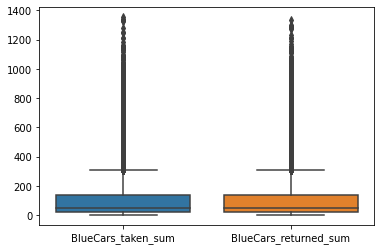

In [8]:
sns.boxplot(data=df[['BlueCars_taken_sum','BlueCars_returned_sum']])

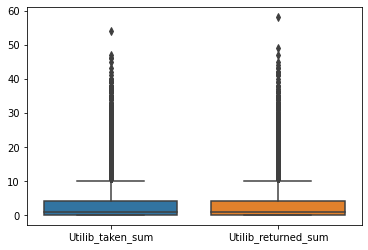

In [10]:

# detecting outliers for utilibs taken and returned

sns.boxplot(data=df[['Utilib_taken_sum','Utilib_returned_sum']])

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
IQR

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64

In [14]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2


##univariate analysis

In [ ]:
#histogr
plt.figure(figsize=(10,9))
plt.hist(df['n_daily_data_points'], bins=5, histtype='bar', orientation='horizontal', color='lightgreen')
plt.title('daily data points', fontweight='bold', style='italic')
plt.xlabel('BlueCars_taken_sum')
plt.ylabel('Postal code')
plt.show()

In [ ]:

num_bins = 4

plt.hist(df['BlueCars_taken_sum'], num_bins, histtype="bar", rwidth=2, color='green')

plt.xlabel("Blue Cars taken")


plt.ylabel("No. of cars")

plt.title("Distribution of Blue Cars taken")

In [ ]:

num_bins = 4

plt.hist(df['BlueCars_returned_sum'], num_bins, histtype="bar", rwidth=2, color='yellow')

plt.xlabel("Blue Cars returned")
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Blue Cars returned")

In [ ]:

num_bins = 4

plt.hist(df['Utilib_taken_sum'], num_bins, histtype="bar", rwidth=2, color='gold')
# Labelling our x axis
plt.xlabel("Utilib_taken_sum")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Utilib_taken_sum")

In [ ]:
num_bins = 4

plt.hist(df['Utilib_returned_sum'], num_bins, histtype="bar", rwidth=2, color='purple')
# Labelling our x axis
plt.xlabel("Utilib Cars returned")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Utilib Cars returned")

In [ ]:

num_bins = 4

plt.hist(df['Utilib_14_taken_sum'], num_bins, histtype="bar", rwidth=2, color='blue')

plt.xlabel("Utilib_14 Cars taken")

# Labelling y axis
plt.ylabel("No. of cars")

# title
plt.title("Distribution of Utilib_14 Cars taken")

In [ ]:

num_bins = 4

plt.hist(df['Utilib_14_returned_sum'], num_bins, histtype="bar", rwidth=1, color='maroon')
# Labelling our x axis
plt.xlabel("Utilib_14 Cars returned")

# Labelling our y axis
plt.ylabel("No. of cars")

# Giving a title to our Bar chart
plt.title("Distribution of Utilib_14 Cars returned")

In [ ]:
df.head(1)

In [ ]:
#finding mean 
df[{'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'}].mean()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
df.groupby('BlueCars_taken_sum')['Utilib_taken_sum'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('blue cars vs utilib',size=15)
plt.ylabel('blue cars')
plt.show()

##bivariate analysis

In [30]:
#bivariate analysis
# Loading the dataset

# Calculating the pearson coefficient
pearson_coeff = df["BlueCars_taken_sum"].corr(df["Utilib_taken_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df["BlueCars_taken_sum"].corr(df["Utilib_taken_sum"]) 
print(coeff)

0.8938325700709975
0.8938325700709975


In [ ]:
df.head(1)

In [ ]:
df[['BlueCars_taken_sum', 'Utilib_taken_sum', 'Utilib_14_taken_sum']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("number of blue cars, utilib and utilib 14 cars taken", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("n_daily_data_points", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("dayOfWeek", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

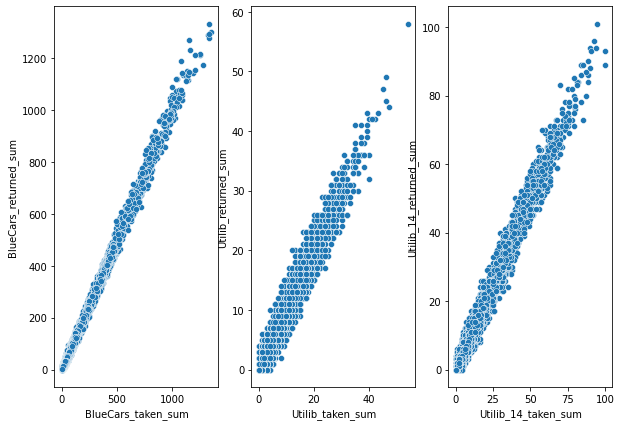

In [15]:

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10, 7))
fig.suptitle('')
sns.scatterplot(x= df.BlueCars_taken_sum , y= df.BlueCars_returned_sum, ax=ax1)
sns.scatterplot(x= df.Utilib_taken_sum, y= df.Utilib_returned_sum, ax=ax2)
sns.scatterplot(x=df.Utilib_14_taken_sum , y= df.Utilib_14_returned_sum, ax=ax3)

plt.show()

In [16]:
# Finding a correlation between the dataset
pearson_coeff = df["BlueCars_taken_sum"].corr(df["BlueCars_returned_sum"], method="pearson") 
print('BlueCars', pearson_coeff)
pearson_coeff = df['Utilib_taken_sum'].corr(df["Utilib_returned_sum"], method="pearson") 
print('Utilib_Corr', pearson_coeff)
pearson_coeff = df["Utilib_14_taken_sum"].corr(df["Utilib_14_returned_sum"], method="pearson") 
print('Utilib_14_Corr', pearson_coeff)

BlueCars 0.9986597051672199
Utilib_Corr 0.9819819805363551
Utilib_14_Corr 0.9920620707048171


#hypothesis testing

total number of cars taken and returned

In [17]:
df['total_vehicles_taken'] = df['BlueCars_taken_sum'] + df['Utilib_taken_sum'] + df['Utilib_14_taken_sum']

df['total_vehicles_returned'] = df['BlueCars_returned_sum'] + df['Utilib_returned_sum'] + df['Utilib_14_returned_sum']


sum utilib and utilib 14

In [18]:
df['total_Utilib_vehicles_taken'] =df['Utilib_taken_sum'] + df['Utilib_14_taken_sum']

In [19]:
# randomly selecting a day between 0 and 4
random_number = np.random.randint(0, 4)
random_number

3

In [20]:
sampled_df = df[df['dayOfWeek']== random_number]

sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 3 to 16079
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Postal code                  2268 non-null   int64 
 1   date                         2268 non-null   object
 2   n_daily_data_points          2268 non-null   int64 
 3   dayOfWeek                    2268 non-null   int64 
 4   day_type                     2268 non-null   object
 5   BlueCars_taken_sum           2268 non-null   int64 
 6   BlueCars_returned_sum        2268 non-null   int64 
 7   Utilib_taken_sum             2268 non-null   int64 
 8   Utilib_returned_sum          2268 non-null   int64 
 9   Utilib_14_taken_sum          2268 non-null   int64 
 10  Utilib_14_returned_sum       2268 non-null   int64 
 11  Slots_freed_sum              2268 non-null   int64 
 12  Slots_taken_sum              2268 non-null   int64 
 13  total_vehicles_taken         226

###hypothesis 1:
on any weekday, the average number of bluecars, utilib and utilib_14 cars taken is higher than the average number returned
choosing a confidence level at 95% and therfore an alpha value of 0.05
H0: the average vehicles taken is less than or equal to average vehicles returned
H1: the average vehicles taken is gretaer than average vehicles returned

In [21]:
#zScore
total_pop_mean = df['total_vehicles_taken'].mean()

total_pop_std_dev = df['total_vehicles_taken'].std()

sampled_pop_mean = sampled_df['total_vehicles_returned'].mean()

total_sampled_pop = sampled_df['total_vehicles_returned'].count()

## Compute the z score
zscore_hypothesis_1 = (sampled_pop_mean - total_pop_mean) / total_pop_std_dev

zscore_hypothesis_1

-0.05397555479832159

In [22]:
prob_hypothesis_1 = 1 - stats.norm.cdf(zscore_hypothesis_1)
prob_hypothesis_1

0.5215226798558439

pvalue is at 0.5215 which is greater thatn 0.05 thus we accept the null hypothesis. that is, the average number of vehicles is less than or equal to average vehicles returned

###hypothesis 2
on any weeday, the number of bluecars taken is more than the total nmber of utilib and utilib_14 cars taken.
confidence level is at 0.95 and alpha value at 0.05

In [23]:
# Average number of all BluCars taken during the period of our review
avg_BlueCars = df['BlueCars_taken_sum'].mean()
avg_Utilib_vehicles=df['total_Utilib_vehicles_taken'].mean()
# Average of a sample of Utilib and Utilib_14 cars taken on a random day
sampled_Bluecars_mean=sampled_df['BlueCars_taken_sum'].mean()
sampled_Utilib_vehicles_mean = sampled_df['total_Utilib_vehicles_taken'].mean()

# Standard deviation of all BluCars taken during the period of our review
std_dev_BlueCars = df['BlueCars_taken_sum'].std()
std_dev_Utilib_vehicles = df['total_Utilib_vehicles_taken'].std()

In [24]:

## Compute the z score
zstat = (sampled_Utilib_vehicles_mean-avg_BlueCars)/std_dev_BlueCars
zstat

-0.6180237330304179

In [25]:
# P value

prob_hypothesis_2 = 1 - stats.norm.cdf(zstat)
prob_hypothesis_2

0.7317201528454087

0.7317 is grretaer than 0.05, thus the null hypothesis is accepted. that is, the number of bluecars taken is less than or eqyal to the total utilib and utilib_14 cars taken

###hypothesis 3
number of vehicles taken in postal code 75015 is equal to the number of cars taken in 75017
for this test, confidence level will be at 0.95, alpha value ay 0.05

In [27]:
# Average number of vehicles taken in postal code 75015 and 75017
vehicles_75015 =df[df['Postal code']== 75015]
vehicles_75015_avg = vehicles_75015['total_vehicles_taken'].mean()

vehicles_75017 =df[df['Postal code']== 75017]
vehicles_75017_avg = vehicles_75017['total_vehicles_taken'].mean()


# Average sample of number of vehicles taken in postal code 75017
sample_vehicles_75015 = sampled_df[sampled_df['Postal code']== 75015]
sample_vehicles_75015_avg = sample_vehicles_75015['total_vehicles_taken'].mean()

sample_vehicles_75017 = sampled_df[sampled_df['Postal code']== 75017]
sample_vehicles_75017_avg = sample_vehicles_75017['total_vehicles_taken'].mean()

# Standard deviation of vehicles taken in postal code 75015
vehicles_75015_std_dev= vehicles_75015['total_vehicles_taken'].std() 
vehicles_75017_std_dev = vehicles_75017['total_vehicles_taken'].std()

In [28]:
#z score
zstat = (sample_vehicles_75017_avg-vehicles_75015_avg)/vehicles_75015_std_dev
zstat

-1.051098226687255

In [29]:
# P value

prob_hypothesis_3 = 1 - stats.norm.cdf(zstat)
prob_hypothesis_3

0.853393260768986

a p value of 0.85 is gretaer than the alpha value at 0.05. thus we accepte the null hypothesis taht the number of cars taken from 75015 is equal to the number of cars taken from 75017